In [19]:
#install.packages('randomForest')
library(readxl)
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('dplyr')
library(dplyr)
#install.packages('caret')
library(Rcpp)
library(caret)
library(rpart)
#install.packages('tree')
library(tree)
#install.packages('multcomp')
library(multcomp)
#install.packages('party')
library(party)
library(tree)
#install.packages('Metrics')
library(Metrics)
#install.packages('reprtree')
#devtools::install_github("MI2DataLab/randomForestExplainer")
#install.packages('randomForestExplainer')
library(randomForestExplainer)
#install.packages("scales")
library(scales)


Installing package into 'C:/Users/hichul/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hichul\AppData\Local\Temp\RtmpiuVOXP\downloaded_packages


Warning message:
"package 'scales' was built under R version 4.0.4"

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




# FA (weighted) Classifcation

,Country,bicy,cart,mcyc,pcar,boat,wigc,clusters,cgdp,tpop,...,popd,land,lita,lity,mori,rifr,cotw,moru,ppfg,prec
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,1,18353881130,37172386,...,56.93776,652860,43.01972,0.75933,62.5,1299.0269,0.00000,13.9,0.70,327
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,2,15147020535,2866376,...,104.61226,27400,98.14115,1.00582,9.5,9361.5460,59.95146,0.2,1.36,1485
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,1,101353230785,30809762,...,24.71305,1246700,0.00000,0.00000,77.7,4963.6533,43.98964,48.8,0.97,1010
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,2,12457941907,2951776,...,103.68022,28470,0.00000,0.00000,12.4,2329.1833,27.77778,0.2,0.77,562
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,3,47112941176,9939771,...,120.23432,82670,0.00000,0.00000,21.6,823.5207,24.48847,1.1,0.56,447
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,1,274039092455,161356039,...,1239.57931,130170,73.91220,1.03276,32.3,657.6039,14.19624,11.9,1.12,2666


n
<int>
73


,Country,clusters,bicy,cart,mcyc,pcar,boat,wigc,cgdp,tpop,upop,popd,land,rifr,prec
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1,0.36585366,0.139759036,0.447268107,0.1929825,0.00000000,0.2,0.006764749,0.027481820,0.2802295,0.03312286,0.219503581,0.004145345,0.08654751
2,Albania,2,0.32195122,0.077108434,0.121982211,0.6350877,0.11864407,0.2,0.005582786,0.002119133,0.6629992,0.06085694,0.009115709,0.030080791,0.44967074
3,Angola,1,0.05609756,0.031325301,0.226175349,0.1771930,0.06779661,0.6,0.037356087,0.022777885,0.7201002,0.01437652,0.419255337,0.015933685,0.30072123
4,Armenia,2,0.10487805,0.009638554,0.002541296,0.6736842,0.05084746,0.2,0.004591664,0.002182270,0.6941052,0.06031473,0.009475628,0.007459144,0.16023832
5,Azerbaijan,3,0.08414634,0.079518072,0.013977128,0.3438596,0.01694915,0.0,0.017364569,0.007348546,0.6120094,0.06994488,0.027707046,0.002615740,0.12417686
6,Bangladesh,1,0.30609756,0.000000000,0.081321474,0.0000000,0.00000000,0.6,0.101003473,0.119291714,0.4026424,0.72111049,0.043684765,0.002082020,0.82000627


,Country,clusters,bicy,cart,mcyc,pcar
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1,0.36585366,0.139759036,0.447268107,0.1929825
2,Albania,2,0.32195122,0.077108434,0.121982211,0.6350877
3,Angola,1,0.05609756,0.031325301,0.226175349,0.1771930
4,Armenia,2,0.10487805,0.009638554,0.002541296,0.6736842
5,Azerbaijan,3,0.08414634,0.079518072,0.013977128,0.3438596
6,Bangladesh,1,0.30609756,0.000000000,0.081321474,0.0000000


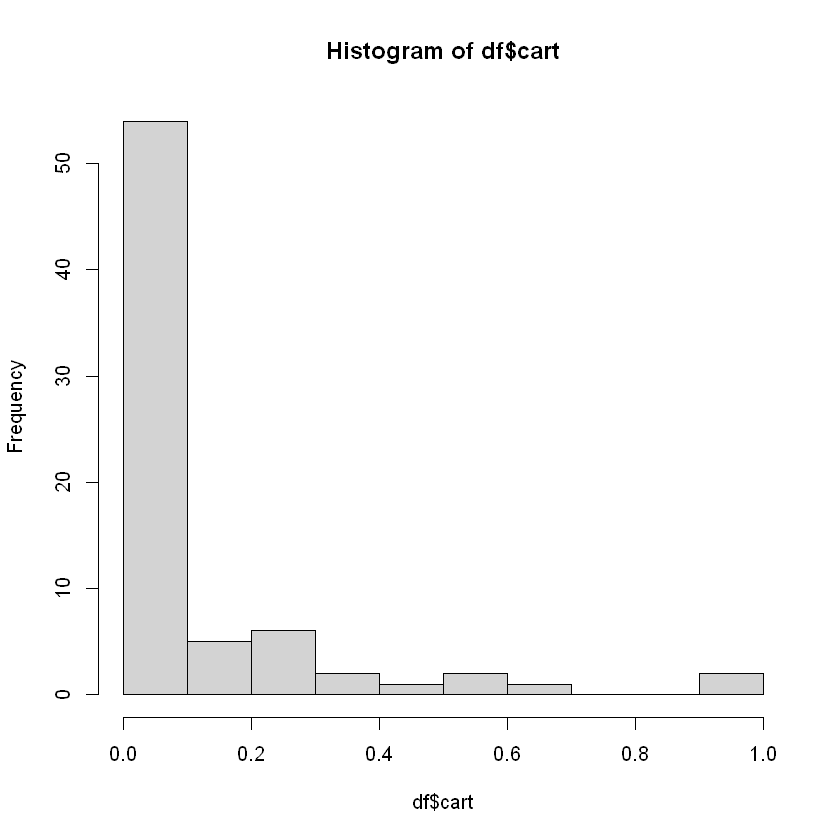

In [70]:
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.exp =read_excel("../../results/df-water-explore.xlsx" ,sheet=1)
df.cluster = read_excel("../../results/df-fa-five-cluster-rank.xlsx" ,sheet=1)
df.wb = read_excel("../../results/df-wb.xlsx" ,sheet=1 )
df.exp$clusters <- as.factor(df.cluster$clusters)
df <- merge(x = df.exp,
              y = df.wb,
              by = c("Country"))

head(df)
count(df)
df <- df[, c(1:13, 17,21)]

# ReScaling in 0 to 1 for all the necessary data
df.scale = as.data.frame(apply(as.matrix(df[, c(2:7, 9:15)]), 2, rescale))
df <- cbind(df,df.scale)
df <- df[,c(1,8,16:28)]
head(df)

df.a <- df[, c(1:6)]
head(df.a)

hist(df$cart)

# Tree


Classification tree:
tree(formula = clusters ~ . - Country, data = df)
Variables actually used in tree construction:
[1] "pcar" "boat" "cgdp" "cart" "mcyc" "popd" "upop"
Number of terminal nodes:  9 
Residual mean deviance:  0.8571 = 54.85 / 64 
Misclassification error rate: 0.1781 = 13 / 73 

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 73 171.400 1 ( 0.54795 0.15068 0.19178 0.10959 )  
   2) pcar < 0.203509 49  68.590 1 ( 0.79592 0.04082 0.12245 0.04082 )  
     4) boat < 0.161017 42  37.390 1 ( 0.88095 0.04762 0.07143 0.00000 )  
       8) cgdp < 0.059598 36  20.650 1 ( 0.91667 0.00000 0.08333 0.00000 )  
        16) pcar < 0.0666667 19   0.000 1 ( 1.00000 0.00000 0.00000 0.00000 ) *
        17) pcar > 0.0666667 17  15.840 1 ( 0.82353 0.00000 0.17647 0.00000 )  
          34) cart < 0.0590361 9  11.460 1 ( 0.66667 0.00000 0.33333 0.00000 ) *
          35) cart > 0.0590361 8   0.000 1 ( 1.00000 0.00000 0.00000 0.00000 ) *
       9) cgdp > 0.059598 6   7.638 1 ( 0.66667 0.33333 0.00000 0.00000 ) *
     5) boat > 0.161017 7  15.110 3 ( 0.28571 0.00000 0.42857 0.28571 ) *
   3) pcar > 0.203509 24  58.220 2 ( 0.04167 0.37500 0.33333 0.25000 )  
     6) mcyc < 0.0838628 11  18.920 3 ( 0.09091 0.27273 0.63636 0.00000 )  
      12) popd < 0.038

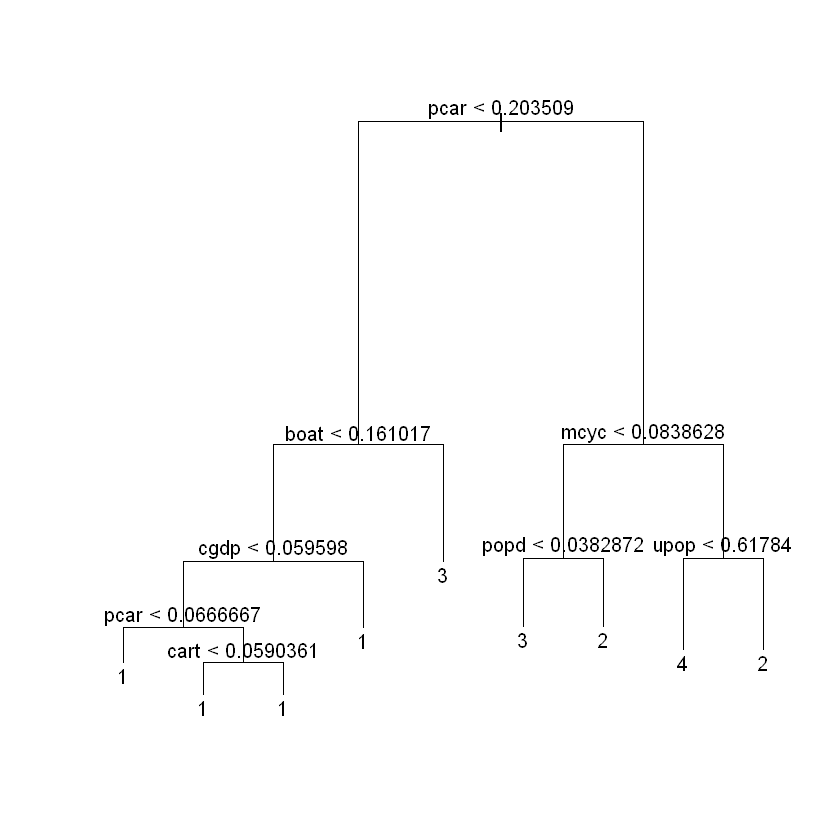

In [73]:
tree.wa = tree(clusters ~ . - Country  , data = df)
summary(tree.wa) 
plot(tree.wa)
text(tree.wa, pretty = 0) #population density High density for six cluster group.
tree.wa

# Random Forest


Call:
 randomForest(formula = clusters ~ . - Country, data = df, ntree = 200,      mtry = 5) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 5

        OOB estimate of  error rate: 36.99%
Confusion matrix:
   1 2 3 4 class.error
1 37 0 3 0   0.0750000
2  2 5 2 2   0.5454545
3  5 4 3 2   0.7857143
4  2 2 3 1   0.8750000


                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted         73   factor numeric  
err.rate        1000   -none- numeric  
confusion         20   -none- numeric  
votes            292   matrix numeric  
oob.times         73   -none- numeric  
classes            4   -none- character
importance        13   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                 73   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

,MeanDecreaseGini
bicy,1.680468
cart,1.595374
mcyc,3.508374
pcar,11.565421
boat,4.021563
wigc,2.725421
cgdp,2.517385
tpop,2.385258
upop,4.294838
popd,3.576003


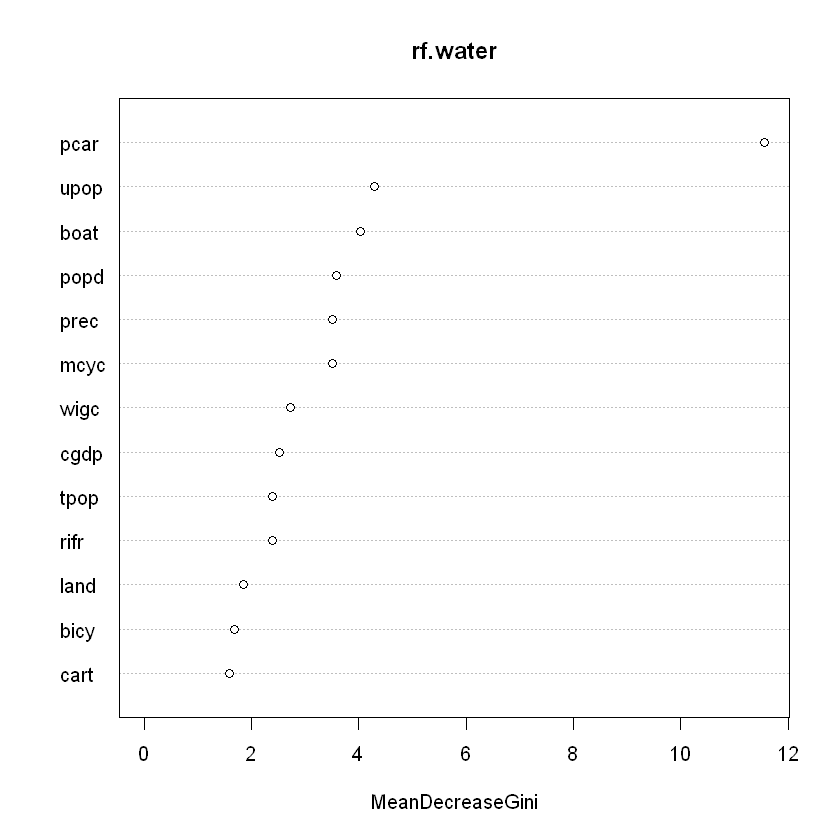

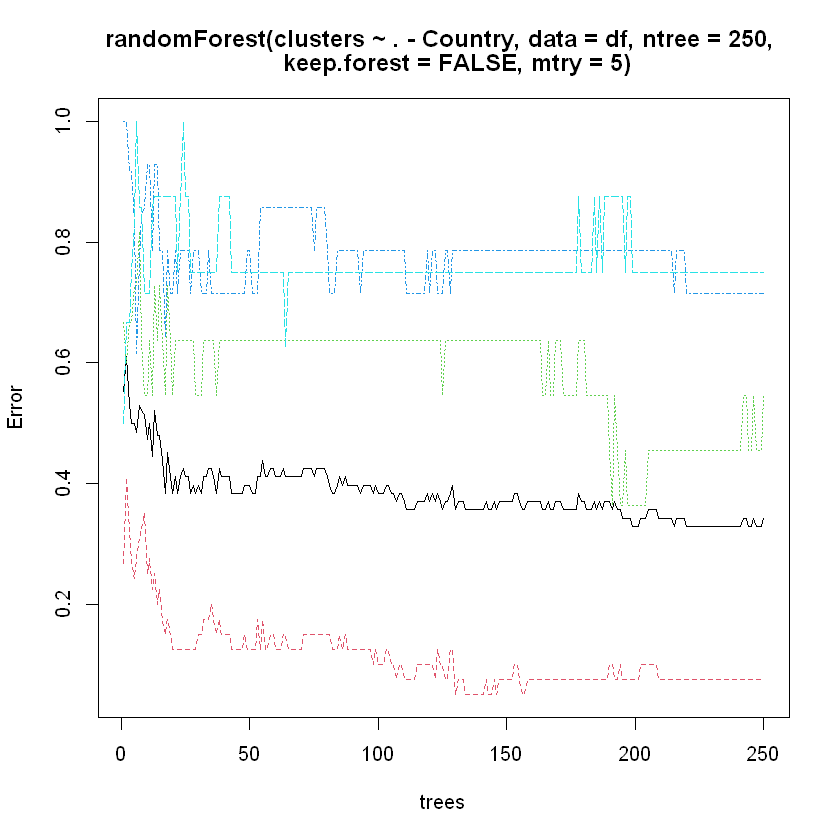

In [78]:
rf.water = randomForest(clusters~. -Country, data = df , ntree= 200,mtry=5)
print(rf.water)

summary(rf.water)

importance <- importance(rf.water, sort = TRUE)
importance

# create an importance plot
varImpPlot(rf.water, sort=TRUE, n.var=min(30, nrow(rf.water$importance)),
           type=NULL, class=NULL, scale=TRUE )
#plot
plot(randomForest(clusters~. -Country, data = df ,ntree=250,  keep.forest=FALSE, mtry=5) )

The MeanDecreaseGini measures the Gini importance = how important the features are over all splits done in the tree/forest - whereas for each individual split the Gini importance indicates how much the Gini criterion = "unequality/heterogeneity" was reduced using this split.
mori, upop, pcar popd, mcyc important and contributed most to obtaining such splits, so they are considered more important.